In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install ultralytics 

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/d3/05/5a98fcd5e405d89f293ddd74ac8dc3cc6940306adbfeaf343a3e6bd5d6d9/ultralytics-8.1.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 19.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0 (Tesla P100-PCIE-16GB)


In [4]:
import glob 
import cv2 
from PIL import Image
import yaml 

In [5]:
!cp /kaggle/input/bone-fracture-detection-computer-vision-project/data.yaml data.yaml 
!cp -R /kaggle/input/bone-fracture-detection-computer-vision-project bone-fracture-detection-computer-vision-project

In [6]:
config_file_template = '''
train: ../bone-fracture-detection-computer-vision-project/train/images
val: ../bone-fracture-detection-computer-vision-project/valid/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']
'''

with open('data.yaml', 'w') as f:
    f.write(config_file_template)

In [8]:
with open('/kaggle/working/data.yaml', 'r') as f:
    file_path=yaml.safe_load(f)
print(file_path)

{'train': '../bone-fracture-detection-computer-vision-project/train/images', 'val': '../bone-fracture-detection-computer-vision-project/valid/images', 'nc': 7, 'names': ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']}


In [9]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 92.2MB/s]

Transferred 355/355 items from pretrained weights


In [12]:
image_list=glob.glob("bone-fracture-detection-computer-vision-project/train/images/*")
img=cv2.imread(image_list[0])
img_shape=img.shape
img_shape

(379, 512, 3)

In [15]:
model.train(data='data.yaml',epochs=20,imgsz=(379,512))

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=(379, 512), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 28.6MB/s]
2024-01-25 15:31:30,421	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-25 15:31:30,918	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=512'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'


train: Scanning /kaggle/working/bone-fracture-detection-computer-vision-project/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:03<00:00, 1189.97it/s]


train: New cache created: /kaggle/working/bone-fracture-detection-computer-vision-project/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/bone-fracture-detection-computer-vision-project/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 968.59it/s] 

val: New cache created: /kaggle/working/bone-fracture-detection-computer-vision-project/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.48G       2.89      6.073      2.207         18        512: 100%|██████████| 227/227 [00:35<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]


                   all        348        204   0.000726      0.203    0.00587   0.000998

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.51G      2.567      4.704      1.952         18        512: 100%|██████████| 227/227 [00:31<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.78it/s]

                   all        348        204      0.591     0.0487     0.0443     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.57G      2.522      3.965      1.934         14        512: 100%|██████████| 227/227 [00:30<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.09it/s]

                   all        348        204      0.509     0.0269      0.033     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       1.5G      2.469      3.606      1.917         23        512: 100%|██████████| 227/227 [00:30<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.98it/s]


                   all        348        204      0.382     0.0902     0.0495     0.0199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       1.5G      2.418      3.293      1.872         18        512: 100%|██████████| 227/227 [00:30<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.33it/s]

                   all        348        204      0.415     0.0794     0.0631     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       1.5G      2.345      3.115      1.851         16        512: 100%|██████████| 227/227 [00:30<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.10it/s]


                   all        348        204      0.223      0.171      0.136     0.0488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.57G      2.291      2.969      1.799         20        512: 100%|██████████| 227/227 [00:30<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.28it/s]


                   all        348        204      0.196      0.169      0.143     0.0523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.57G        2.2      2.817      1.767         17        512: 100%|██████████| 227/227 [00:30<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.33it/s]

                   all        348        204      0.269      0.161      0.161     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.57G      2.197       2.75      1.749         16        512: 100%|██████████| 227/227 [00:30<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.93it/s]

                   all        348        204      0.211      0.292      0.196      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.57G      2.151      2.608      1.706         19        512: 100%|██████████| 227/227 [00:30<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]

                   all        348        204      0.305      0.252       0.21     0.0763


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.57G      2.101      2.501        1.8          7        512: 100%|██████████| 227/227 [00:30<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.02it/s]

                   all        348        204      0.235      0.279      0.215     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.57G      2.052      2.345      1.778         11        512: 100%|██████████| 227/227 [00:29<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.12it/s]

                   all        348        204      0.212      0.267      0.184     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.57G      2.004      2.278      1.739          6        512: 100%|██████████| 227/227 [00:29<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.96it/s]

                   all        348        204      0.317      0.265      0.215      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.57G      1.958      2.132      1.708          8        512: 100%|██████████| 227/227 [00:29<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.60it/s]


                   all        348        204      0.306      0.256      0.223     0.0817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       1.5G      1.916      2.045      1.683         11        512: 100%|██████████| 227/227 [00:29<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.28it/s]

                   all        348        204      0.333      0.298      0.251     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.57G      1.879      1.938      1.647         12        512: 100%|██████████| 227/227 [00:29<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.27it/s]

                   all        348        204      0.292      0.341      0.264      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.57G      1.802      1.815      1.599         11        512: 100%|██████████| 227/227 [00:29<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.16it/s]

                   all        348        204      0.301      0.256      0.238     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       1.5G      1.771      1.739      1.565         12        512: 100%|██████████| 227/227 [00:29<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.88it/s]

                   all        348        204      0.268      0.318      0.234     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.57G      1.719      1.675      1.548          6        512: 100%|██████████| 227/227 [00:29<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.18it/s]

                   all        348        204       0.32      0.336      0.266     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.57G      1.697      1.588      1.523         11        512: 100%|██████████| 227/227 [00:29<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.56it/s]


                   all        348        204      0.335      0.309      0.269     0.0935

20 epochs completed in 0.183 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.41it/s]


                   all        348        204       0.29      0.341      0.263      0.104
        elbow positive        348         29      0.203      0.241      0.147     0.0531
      fingers positive        348         48      0.297      0.208      0.156     0.0529
      forearm fracture        348         43      0.416      0.488      0.453      0.209
               humerus        348         36      0.449      0.528       0.53       0.19
     shoulder fracture        348         20       0.21        0.4      0.213     0.0824
        wrist positive        348         28      0.168      0.179     0.0814     0.0352
Speed: 0.5ms preprocess, 1.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▁▂▂▂▃▅▅▅▆▇▇▆▇▇██▇▇██
metrics/mAP50-95(B),▁▂▂▂▃▄▄▅▆▆▆▆▆▆██▇▇▇█
metrics/precision(B),▁█▇▆▆▄▃▄▃▅▄▄▅▅▅▄▅▄▅▄
metrics/recall(B),▅▁▁▂▂▄▄▄▇▆▇▆▆▆▇█▆▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▅▅▄▄▄▄▃▃▃▃▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a87bcd31c00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [16]:
model.export(format='openvino') 

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 512, 512) BCHW and output shape(s) (1, 11, 5376) (5.9 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.8s, saved as 'runs/detect/train/weights/best.onnx' (11.6 MB)
requirements: Ultralytics requirement ['openvino-dev>=2023.0'] not found, attempting AutoUpdate...
  Obtaining dependency information for openvino-dev>=2023.0 from https://files.pythonhosted.org/packages/b4/60/153eb5117c8cdb412d650a3a83f8a882b379063432e9f023425d49976a74/openvino_dev-2023.3.0-13775-py3-none-any.whl.metadata
  Preparing metadata (setup.py): st

'runs/detect/train/weights/best_openvino_model'

In [17]:
model.export() 

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 512, 512) BCHW and output shape(s) (1, 11, 5376) (5.9 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 1.7s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (3.1s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=512  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=512 data=data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'


0: 512x512 1 shoulder fracture, 1: 512x512 1 humerus, 2: 512x512 1 humerus, 3: 512x512 (no detections), 4: 512x512 (no detections), 8.7ms
Speed: 1.1ms preprocess, 1.7ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)


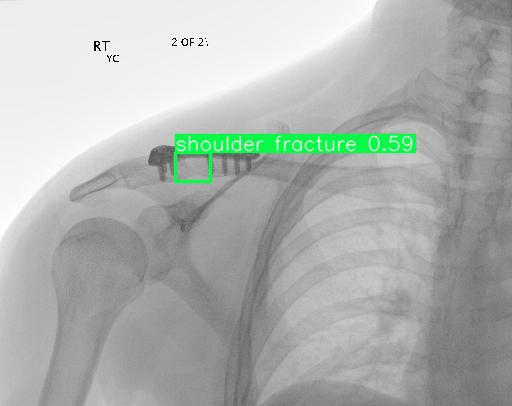

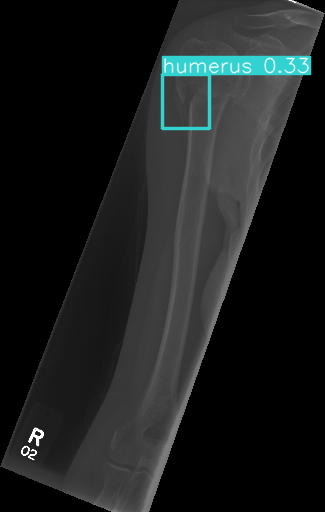

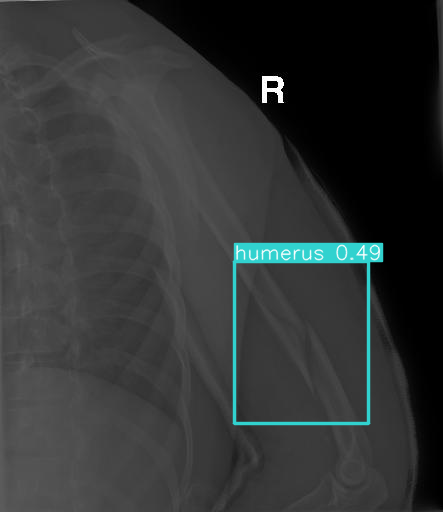

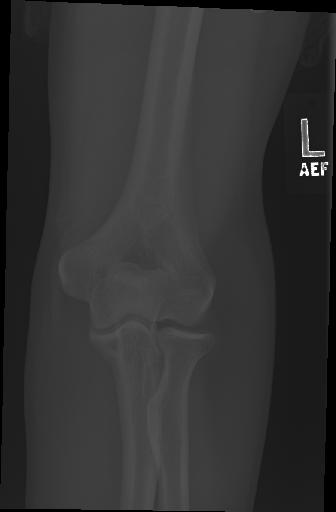

In [34]:
from PIL import Image
test_images=glob.glob("/kaggle/input/bone-fracture-detection-computer-vision-project/test/images/*.jpg")
results=model(test_images[40:45],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))